In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Master_File_Housing_Data_LogisticReg2.csv')

df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-2].values
y = df.iloc[:,14].values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

#print(X[0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()
#print(data[0])
NewData = data[:,[0,1,2,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25]]

X_sig = NewData[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train[0])
print(y_train[0])


[-0.29 -0.38 -0.35 -0.29 -0.27  2.49 -0.31 -0.34 -0.42 -0.21 -0.11 -0.22
 -0.25 -0.09  0.38 -0.11 -0.34 -0.86  1.4   0.94 -0.01]
0


C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.


C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6072684642438453
Confusion matrix, without normalization
[[343 427]
 [243 693]]


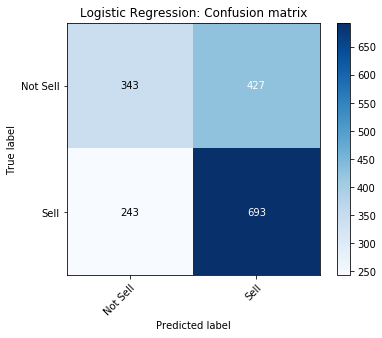

In [4]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)


#Model Accuracy
print(classifierObj.score(X_test,y_test))


import itertools
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_names=["Not Sell","Sell"]

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Only use the labels that appear in the data
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y))-0.5, -0.5) # ADD THIS LINE
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Logistic Regression: Confusion matrix')

plt.show()

In [5]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC
classifierObj = SVC(kernel='linear')
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#Model Accuracy
print(classifierObj.score(X_test,y_test))

0.5779601406799532


0.5486518171160609
0.570926143024619
0.5650644783118406
0.5978898007033998
0.593200468933177
0.6078546307151231
0.5885111371629543
0.5826494724501758
0.5756154747948418
0.5679953106682297
The value of degree that gives you the best accuracy is 4.


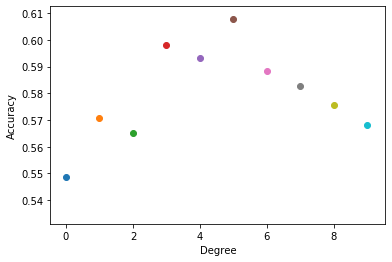

In [6]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

for i in (0,1,2,3,4,5,6,7,8,9):
    classifierObj = SVC(kernel='poly', degree = i)
    classifierObj.fit(X_train, y_train)
    print(classifierObj.score(X_test,y_test))
    plt.scatter(x = i,y =classifierObj.score(X_test,y_test))
    plt.xlabel('Degree')
    plt.ylabel('Accuracy')
    
    


#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

print("The value of degree that gives you the best accuracy is 4.")

0.6178194607268465
Confusion matrix, without normalization
[[346 424]
 [228 708]]


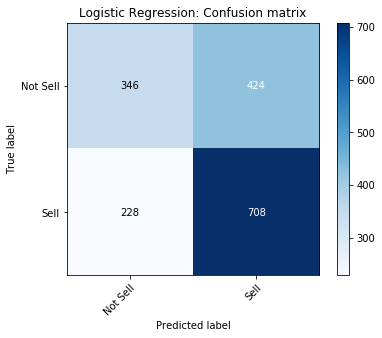

In [7]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC
classifierObj = SVC(kernel='rbf', degree = 9)
classifierObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#Model Accuracy
print(classifierObj.score(X_test,y_test))

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_names=["Not Sell","Sell"]

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Only use the labels that appear in the data
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y))-0.5, -0.5) # ADD THIS LINE
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Logistic Regression: Confusion matrix')

plt.show()

0.5844079718640094
0.5873388042203986
0.5949589683470106
0.5961313012895663
0.5984759671746777
0.5943728018757327
0.5949589683470106
0.604337631887456
0.604337631887456
0.604337631887456
0.5984759671746777
0.597303634232122
0.604337631887456
0.5937866354044549
0.5955451348182884
0.5885111371629543
0.5937866354044549
0.5873388042203986
0.5861664712778429
The value of k that gives you the best accuracy is 41.


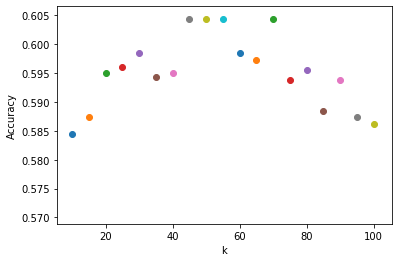

In [17]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.neighbors import KNeighborsClassifier
for i in (10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100):
    classifierObj = KNeighborsClassifier(n_neighbors= i, p = 2, metric='minkowski')
    classifierObj.fit(X_train, y_train)
    print(classifierObj.score(X_test,y_test))
    plt.scatter(x = i,y =classifierObj.score(X_test,y_test))
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    

print("The value of k that gives you the best accuracy is 45, 50, 55, 70.")

In [9]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.naive_bayes import GaussianNB
classifierObj = GaussianNB()
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print(classifierObj.score(X_test,y_test))

0.5691676436107854


In [10]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print(classifierObj.score(X_test,y_test))

0.5691676436107854


0.5515826494724502
0.5984759671746777
0.6037514654161782
0.5914419695193435
0.5750293083235639
0.6072684642438453
0.5920281359906213
0.6184056271981243
0.5984759671746777
0.6019929660023446
0.6060961313012896
0.6131301289566237
0.6090269636576788
0.6060961313012896
0.6037514654161782
0.604337631887456
0.6113716295427901
The value of n_estimators that gives you the best accuracy is changing with each run, but is currently 60.


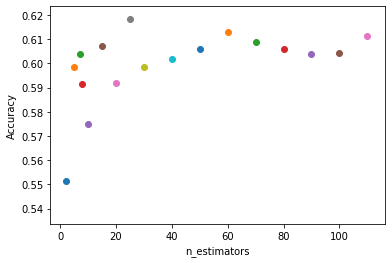

In [11]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
for i in (2, 5, 7, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110):
    classifierObj = RandomForestClassifier(criterion='entropy', n_estimators = i)
    classifierObj.fit(X_train,y_train)
    print(classifierObj.score(X_test,y_test))
    plt.scatter(x = i,y =classifierObj.score(X_test,y_test))
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    

print("The value of n_estimators that gives you the best accuracy is changing with each run, but is currently 60.")


In [12]:


#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier()

grid_param = {  
    'n_estimators': [10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifierObj, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train) 
print(gd_sr.best_params_)  
print(gd_sr.best_score_)


{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
0.6219205630970337


In [18]:
classifierObj = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators = 190)
classifierObj.fit(X_train,y_train)
print(classifierObj.score(X_test,y_test))

0.6055099648300117


In [42]:
xtest1 = ([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1563,50094,2,1,0,(265000*1.03)]])
X_test2 = sc_X.transform(xtest1)
ypred1 = gd_sr.predict(X_test2)
print('5508 29th Ave S = ',ypred1, " Assessed Price w/ 3%= ",265000*1.03, "Profit: ",330000-(265000*1.03), " Predict [1]")

xtest1a = ([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1096,5120,1,1.2,0,(269000*1.03)]])
X_test2a = sc_X.transform(xtest1a)
ypred2 = gd_sr.predict(X_test2a)
print('5200 39th Ave S = ',ypred2 , " Assessed Price w/ 3%= ",269000*1.03, "Profit: ",315000-(269000*1.03), " Predict [1]")

xtest1b = ([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2465,5935,2,1.2,1,(426500*1.03)]])
X_test2b = sc_X.transform(xtest1b)
ypred3 = gd_sr.predict(X_test2b)
print('5833 11th Ave S = ',ypred3,  " Assessed Price w/ 3%= ",426500*1.03, "Profit: ",430000-(426500*1.03), " Predict [0]")

xtest1c = ([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2103,5227,2,2.5,1,(611500*1.03)]])
X_test2c = sc_X.transform(xtest1c)
ypred4 = gd_sr.predict(X_test2c)
print('3333 Irving Ave S = ',ypred4,  " Assessed Price w/ 3%= ",611500*1.03, "Profit: ",625000-(611500*1.03), " Predict [0]")

print("Our Model is 50% on this small sample size")

5508 29th Ave S =  [0]  Assessed Price w/ 3%=  272950.0 Profit:  57050.0  Predict [1]
5200 39th Ave S =  [0]  Assessed Price w/ 3%=  277070.0 Profit:  37930.0  Predict [1]
5833 11th Ave S =  [0]  Assessed Price w/ 3%=  439295.0 Profit:  -9295.0  Predict [0]
3333 Irving Ave S =  [0]  Assessed Price w/ 3%=  629845.0 Profit:  -4845.0  Predict [0]
Our Model is 50% on this small sample size
